In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./clustering2.csv', encoding='utf-8', index_col=0)

In [3]:
from sklearn.model_selection import train_test_split

X = []
y = []

path = 'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/2_15_crop'

for i in tqdm_notebook(range(5)):
    random_set = np.random.choice(df[df['cluster']==i]['filename'].values, 2400, replace=False)
    for file in random_set:
        file_path = path + '/' + file
        src = cv2.imread(file_path, cv2.IMREAD_COLOR)
        dst = cv2.resize(src, dsize=(299, 299), interpolation=cv2.INTER_CUBIC)
        X.append(dst)
        y.append(df[df['filename'] == file]['cluster'].values[0]) 

C:\Users\sanghui\AppData\Local\Temp/ipykernel_17908/2470885059.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(5)):


  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

X_train, X_test = X_train/255.0, X_test/225.0

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
from keras.applications.inception_v3 import preprocess_input


input_shape = (299, 299, 3)

base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(5, activation='softmax'))

model = add_model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [6]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
300/300 [==============================] - 479s 2s/step - loss: 0.5422 - accuracy: 0.7857 - val_loss: 0.3505 - val_accuracy: 0.8629
Epoch 2/10
300/300 [==============================] - 464s 2s/step - loss: 0.3554 - accuracy: 0.8554 - val_loss: 0.3232 - val_accuracy: 0.8708
Epoch 3/10
300/300 [==============================] - 468s 2s/step - loss: 0.3343 - accuracy: 0.8607 - val_loss: 0.3380 - val_accuracy: 0.8621
Epoch 4/10
300/300 [==============================] - 478s 2s/step - loss: 0.3152 - accuracy: 0.8707 - val_loss: 0.3056 - val_accuracy: 0.8854
Epoch 5/10
300/300 [==============================] - 477s 2s/step - loss: 0.3060 - accuracy: 0.8771 - val_loss: 0.3299 - val_accuracy: 0.8667
Epoch 6/10
300/300 [==============================] - 474s 2s/step - loss: 0.3032 - accuracy: 0.8783 - val_loss: 0.3080 - val_accuracy: 0.8775
Epoch 7/10
300/300 [==============================] - 478s 2s/step - loss: 0.2984 - accuracy: 0.8763 - val_loss: 0.3024 - val_accuracy: 0.8821

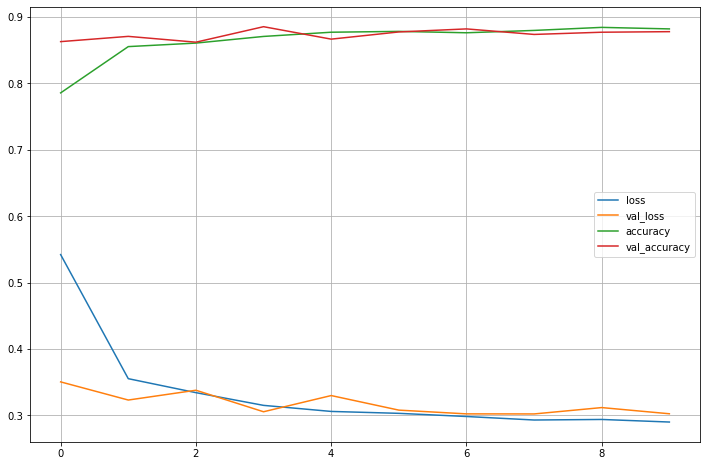

In [7]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()